In [2]:
import os, sys, glob
import math
import numpy as np
import pandas as pd
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.2)

In [5]:
def parseB(filename):
    df = pd.read_csv(filename, sep="\t")
    return df.values[:,10:].astype(float)

In [6]:
def parseU(filename):
    df = pd.read_csv(filename, sep="\t", index_col=0)
    return df.values.astype(float)

In [7]:
def parseF(filename):
    df = pd.read_csv(filename, sep="\t")
    return df.values[:,10:].astype(float)

In [8]:
def extractMask(F):
    return np.ma.masked_invalid(F).mask.astype(float)

# Frobenius norm

In [9]:
with open("simulations.tsv", "w") as f:
    f.write("\t".join(["s", "M", "k", "S", "frob"]) + "\n")
    for filename in glob.glob("simulations/*_filtered.tsv"):
        dirname = os.path.dirname(filename)
        basename = os.path.basename(filename)
        l = basename.split('_')
        s = int(l[0][1:])
        missingStr = l[1][1:]
        missing = float(missingStr)
        k = int(l[2][1:])
        S = int(l[3][1:])

        F = parseF(filename)
        M = extractMask(F)

        filename_B = "%s/s%d_M%s_k%d_S%d_B.txt" % (dirname, s, missingStr, k, S)
        B = parseB(filename_B)

        filename_U = "%s/s%d_M%s_k%d_S%d_U.txt" % (dirname, s, missingStr, k, S)
        U = parseU(filename_U)

        frob = np.linalg.norm(np.nan_to_num(F - np.dot(B,U)))
        
        f.write("\t".join(map(str, [s, missingStr, k, S, frob])) + "\n")

In [10]:
df = pd.read_csv("simulations.tsv", sep="\t")

In [11]:
df['min_frob'] = df.groupby(["s", "M", "k"])["frob"].transform(min)
df["selected"] = df.apply(lambda x: x["min_frob"] == x["frob"], axis=1)

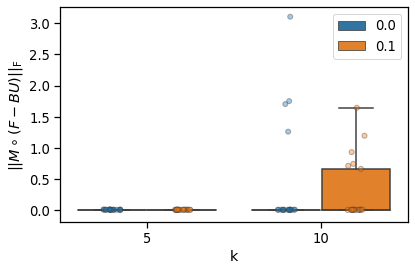

In [12]:
sns.stripplot(data=df[df["selected"]], x="k", y="frob", hue="M", 
              alpha=.4, dodge=True, linewidth=1, jitter=.1,)
sns.boxplot(data=df[df["selected"]], x="k", y="frob", hue="M", 
            showfliers=False)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[0:2], labels[0:2])
plt.gca().set_ylabel("$||M \circ(F - BU)||_\mathrm{F}$")
plt.tight_layout()
plt.savefig("frob.png")